#Importar librerias

In [ ]:
import glob, os
import yaml
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import shutil

# Control del dataset

##Conectar a Google Drive para acceder al dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Entrenamiento de YoloV8

In [2]:
%%capture
!pip install ultralytics --upgrade

Preparamos el archivo de configuración para el entrenamiento.
Ultralytics necesita que suministremos un archivo de configuración en formato YAML (.yml) con la información sobre nuestro dataset y sus divisiones (split)

In [3]:
classes = [
    "1O", "1C", "1E", "1B",
    "2O", "2C", "2E", "2B",
    "3O", "3C", "3E", "3B",
    "4O", "4C", "4E", "4B",
    "5O", "5C", "5E", "5B",
    "6O", "6C", "6E", "6B",
    "7O", "7C", "7E", "7B",
    "8O", "8C", "8E", "8B",
    "9O", "9C", "9E", "9B",
    "10O", "10C", "10E", "10B",
    "11O", "11C", "11E", "11B",
    "12O", "12C", "12E", "12B",
    "J", "SKIP", "SSKIP", "SSSKIP"
]

In [ ]:
len(classes)

52

In [4]:
train_config = \
f"""
# Train/val/test dataset configuration
train: /content/drive/MyDrive/dataset/train
val: /content/drive/MyDrive/dataset/test

# Number of classes
nc: {len(classes)}

# Class names
names: {classes}
"""

# Save yaml
with open('/content/train_config.yml', 'w') as f:
    f.write(train_config)

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")


os.environ['TORCH_USE_CUDA_DSA'] = "1"
# Use the model
model.train(data="/content/train_config.yml", epochs=50, imgsz=512, batch=64)  # train the model
metrics = model.val()

100%|██████████| 6.25M/6.25M [00:00<00:00, 127MB/s]


Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/train_config.yml, epochs=50, time=None, patience=100, batch=64, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]


Overriding model.yaml nc=80 with nc=52

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/dataset/train/labels.cache... 1329 images, 2 backgrounds, 28 corrupt: 100%|██████████| 1335/1335 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_24.jpeg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_24.jpeg'
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_25.jpeg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_25.jpeg'
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_26.jpeg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_26.jpeg'
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_27.jpeg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_27.jpeg'
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/images/03531_mirian_yañez_28.jpeg: ignoring corrupt imag

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/dataset/test/labels.cache... 497 images, 1 backgrounds, 9 corrupt: 100%|██████████| 498/498 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/03531_mirian_yañez_29.jpeg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/test/images/03531_mirian_yañez_29.jpeg'
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_18.jpg: ignoring corrupt image/label: negative label values [   -0.18678    -0.16988]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_23.jpg: ignoring corrupt image/label: negative label values [   -0.15883   -0.036542]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_25.jpg: ignoring corrupt image/label: negative label values [   -0.26338    -0.21159]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_41.jpg: ignoring corrupt image/label: negative label values [   -0.17241     -0.1403]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_42.jpg: ignoring corrupt image/label: 

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.72G      1.453      4.947       1.44        356        512: 100%|██████████| 21/21 [11:36<00:00, 33.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all        489       2934          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.61G      1.256      4.662      1.261        234        512: 100%|██████████| 21/21 [03:51<00:00, 11.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.90s/it]

                   all        489       2934   0.000842    0.00128   0.000457   0.000372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.64G      1.242      4.304      1.215        276        512: 100%|██████████| 21/21 [04:09<00:00, 11.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


                   all        489       2934     0.0193      0.197     0.0148     0.0118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.7G      1.265      4.009      1.249        251        512: 100%|██████████| 21/21 [04:02<00:00, 11.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.31s/it]


                   all        489       2934     0.0219      0.602     0.0285     0.0213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.64G       1.28      3.715      1.281        342        512: 100%|██████████| 21/21 [03:51<00:00, 11.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


                   all        489       2934      0.101      0.121     0.0503     0.0357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.64G      1.324       3.46      1.322        281        512: 100%|██████████| 21/21 [04:16<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


                   all        489       2934      0.131      0.221     0.0695     0.0487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.69G      1.298      3.229      1.304        367        512: 100%|██████████| 21/21 [03:48<00:00, 10.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.33s/it]


                   all        489       2934      0.133      0.244      0.092     0.0631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.55G      1.248      3.049       1.29        253        512: 100%|██████████| 21/21 [04:14<00:00, 12.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.59s/it]


                   all        489       2934       0.16      0.259      0.132     0.0917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.63G      1.258      2.944      1.301        334        512: 100%|██████████| 21/21 [03:55<00:00, 11.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


                   all        489       2934      0.228      0.271      0.163      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.71G      1.246      2.835      1.297        291        512: 100%|██████████| 21/21 [04:04<00:00, 11.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.53s/it]


                   all        489       2934      0.223      0.327      0.196      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.65G      1.198      2.703      1.265        337        512: 100%|██████████| 21/21 [04:02<00:00, 11.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.33s/it]


                   all        489       2934      0.287      0.363      0.253       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.64G      1.206      2.637       1.27        326        512: 100%|██████████| 21/21 [04:01<00:00, 11.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


                   all        489       2934      0.305      0.387      0.279      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.66G      1.194      2.553      1.256        335        512: 100%|██████████| 21/21 [04:10<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]


                   all        489       2934      0.328      0.413      0.319      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.67G      1.192      2.492      1.248        347        512: 100%|██████████| 21/21 [04:06<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.76s/it]


                   all        489       2934      0.357      0.433      0.349      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.67G      1.181      2.442      1.252        302        512: 100%|██████████| 21/21 [04:10<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]


                   all        489       2934        0.4      0.439      0.377      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       5.7G      1.156      2.383      1.231        343        512: 100%|██████████| 21/21 [04:15<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]


                   all        489       2934      0.418      0.444      0.394       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.56G      1.135      2.325      1.219        300        512: 100%|██████████| 21/21 [03:54<00:00, 11.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.46s/it]


                   all        489       2934      0.432      0.459      0.415      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.69G      1.153      2.306      1.225        338        512: 100%|██████████| 21/21 [04:02<00:00, 11.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.92s/it]


                   all        489       2934      0.444      0.461      0.441      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.69G      1.131      2.248      1.211        378        512: 100%|██████████| 21/21 [04:04<00:00, 11.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]


                   all        489       2934      0.492       0.47      0.469      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.74G      1.122      2.215      1.207        319        512: 100%|██████████| 21/21 [03:58<00:00, 11.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]


                   all        489       2934       0.53      0.504      0.498      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.57G      1.112      2.175      1.202        315        512: 100%|██████████| 21/21 [03:54<00:00, 11.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.68s/it]


                   all        489       2934      0.536      0.501      0.505      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.67G      1.108      2.148      1.191        335        512: 100%|██████████| 21/21 [04:12<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.87s/it]


                   all        489       2934      0.539      0.518      0.529      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.71G      1.084      2.087       1.18        275        512: 100%|██████████| 21/21 [03:51<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


                   all        489       2934      0.554      0.499      0.522      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.66G        1.1      2.087      1.191        279        512: 100%|██████████| 21/21 [04:08<00:00, 11.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.17s/it]


                   all        489       2934      0.577      0.532      0.551      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.71G      1.087      2.035      1.191        309        512: 100%|██████████| 21/21 [04:08<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.00s/it]


                   all        489       2934      0.586      0.564      0.571      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.67G      1.054      1.978      1.162        315        512: 100%|██████████| 21/21 [04:00<00:00, 11.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.70s/it]


                   all        489       2934      0.605      0.551      0.572      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.71G      1.077      2.012      1.179        301        512: 100%|██████████| 21/21 [03:57<00:00, 11.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.66s/it]


                   all        489       2934      0.641      0.554      0.592      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.58G      1.079      1.969      1.175        298        512: 100%|██████████| 21/21 [04:12<00:00, 12.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.21s/it]


                   all        489       2934      0.631      0.571      0.604      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.58G      1.059      1.944      1.159        369        512: 100%|██████████| 21/21 [03:58<00:00, 11.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.65s/it]


                   all        489       2934       0.66       0.55      0.606      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.56G       1.04      1.911      1.147        303        512: 100%|██████████| 21/21 [03:50<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.06s/it]


                   all        489       2934      0.682      0.557      0.618       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.71G      1.049      1.907      1.161        322        512: 100%|██████████| 21/21 [04:02<00:00, 11.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.62s/it]


                   all        489       2934      0.673       0.55      0.619      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       5.7G      1.042      1.859      1.148        338        512: 100%|██████████| 21/21 [03:54<00:00, 11.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.70s/it]


                   all        489       2934      0.665      0.574       0.63      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.67G       1.06      1.892      1.161        386        512: 100%|██████████| 21/21 [04:02<00:00, 11.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.18s/it]


                   all        489       2934       0.69      0.561      0.636      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.57G      1.043      1.854      1.153        279        512: 100%|██████████| 21/21 [04:07<00:00, 11.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.96s/it]


                   all        489       2934      0.693      0.573      0.638      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.67G      1.034      1.848      1.156        238        512: 100%|██████████| 21/21 [03:59<00:00, 11.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.06s/it]


                   all        489       2934      0.686      0.588       0.65      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       5.7G      1.015      1.803      1.137        299        512: 100%|██████████| 21/21 [03:58<00:00, 11.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.48s/it]


                   all        489       2934      0.709        0.6      0.667      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.57G      1.023      1.823      1.145        306        512: 100%|██████████| 21/21 [04:11<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.32s/it]


                   all        489       2934      0.704      0.613       0.67      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.67G      1.021      1.816      1.137        336        512: 100%|██████████| 21/21 [03:47<00:00, 10.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.41s/it]


                   all        489       2934      0.708      0.605      0.669      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.67G      1.018      1.785      1.134        344        512: 100%|██████████| 21/21 [04:03<00:00, 11.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]


                   all        489       2934      0.738      0.601      0.678      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.64G       1.01      1.775      1.132        278        512: 100%|██████████| 21/21 [04:00<00:00, 11.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.69s/it]


                   all        489       2934      0.746      0.598      0.675      0.521
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.56G      0.982      1.721      1.122        177        512: 100%|██████████| 21/21 [04:46<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


                   all        489       2934      0.698      0.578      0.648      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.56G     0.9491      1.589      1.107        171        512: 100%|██████████| 21/21 [03:58<00:00, 11.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.43s/it]


                   all        489       2934      0.722      0.602      0.675      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.56G     0.9377      1.558      1.093        158        512: 100%|██████████| 21/21 [04:07<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]


                   all        489       2934      0.706      0.607      0.668      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.52G     0.9308      1.548      1.089        172        512: 100%|██████████| 21/21 [04:12<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.59s/it]


                   all        489       2934      0.738      0.612      0.682      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.52G      0.924      1.533      1.087        159        512: 100%|██████████| 21/21 [03:58<00:00, 11.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.58s/it]


                   all        489       2934      0.734      0.617      0.687      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.54G      0.918      1.503      1.084        179        512: 100%|██████████| 21/21 [04:03<00:00, 11.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]


                   all        489       2934      0.736      0.629      0.694      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.54G     0.9208      1.508      1.087        158        512: 100%|██████████| 21/21 [04:08<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


                   all        489       2934      0.741      0.631      0.702      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.54G     0.9215      1.504      1.082        150        512: 100%|██████████| 21/21 [04:08<00:00, 11.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.58s/it]


                   all        489       2934      0.732      0.638      0.701      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.54G     0.9049       1.48      1.087        161        512: 100%|██████████| 21/21 [04:05<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.97s/it]


                   all        489       2934      0.767      0.626      0.706      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.54G     0.9104       1.49      1.086        166        512: 100%|██████████| 21/21 [04:06<00:00, 11.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]


                   all        489       2934      0.753      0.632      0.706      0.549

50 epochs completed in 3.687 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,015,788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:52<00:00, 28.09s/it]


                   all        489       2934      0.752      0.633      0.706      0.549
                    1O         58         58      0.773      0.763      0.809      0.643
                    1C         68         69      0.762      0.681      0.752      0.545
                    1E         76         76      0.839      0.753      0.864      0.681
                    1B         66         66      0.808      0.764      0.838      0.661
                    2O         58         58      0.722      0.724      0.797      0.584
                    2C         67         68      0.816      0.735       0.81      0.604
                    2E         76         76      0.871      0.855      0.896      0.702
                    2B         66         66        0.9      0.679       0.79      0.599
                    3O         64         64       0.85       0.75      0.832      0.639
                    3C         59         59      0.711      0.678       0.74      0.571
                    3

val: Scanning /content/drive/MyDrive/dataset/test/labels.cache... 497 images, 1 backgrounds, 9 corrupt: 100%|██████████| 498/498 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/03531_mirian_yañez_29.jpeg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/test/images/03531_mirian_yañez_29.jpeg'
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_18.jpg: ignoring corrupt image/label: negative label values [   -0.18678    -0.16988]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_23.jpg: ignoring corrupt image/label: negative label values [   -0.15883   -0.036542]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_25.jpg: ignoring corrupt image/label: negative label values [   -0.26338    -0.21159]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_41.jpg: ignoring corrupt image/label: negative label values [   -0.17241     -0.1403]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_42.jpg: ignoring corrupt image/label: 


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [02:55<00:00, 21.99s/it]


                   all        489       2934       0.75      0.633      0.707      0.549
                    1O         58         58      0.759      0.761      0.804      0.643
                    1C         68         69      0.761      0.692      0.748      0.542
                    1E         76         76      0.837      0.743      0.862      0.681
                    1B         66         66      0.808      0.766      0.836      0.654
                    2O         58         58      0.697      0.724      0.798      0.585
                    2C         67         68      0.816      0.735      0.807        0.6
                    2E         76         76      0.868      0.842      0.897        0.7
                    2B         66         66      0.918      0.681      0.793      0.602
                    3O         64         64      0.819      0.734      0.829      0.637
                    3C         59         59       0.71      0.678      0.743      0.573
                    3

In [ ]:
import shutil
# Ruta de la carpeta que deseas descargar
folder_path = '/content/runs/detect/train/weights'

# Nombre del archivo ZIP que se creará
zip_file_name = 'models_train.zip'

# Comprimir la carpeta
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_path)

In [ ]:
from google.colab import files

files.download('models_train.zip')

# Continuación del entrenamiento del modelo anterior


In [ ]:
! yolo task=detect mode=train resume pretrained=/content/runs/detect/train3/weights/best.pt model=yolov8n.yaml data=/content/train_config.yml epochs=20 batch=64 imgsz=512

Transferred 319/355 items from pretrained weights
Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/train_config.yml, epochs=20, time=None, patience=100, batch=64, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=/content/runs/detect/train3/weights/best.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

# Validamos utilizando el parametro agnostic_nms

In [12]:
from ultralytics import YOLO
model = YOLO("/content/best (12).pt")
metrics = model.val(data='/content/train_config.yml', agnostic_nms=True)  # Ajusta la ruta a tu archivo YAML

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/dataset/test/labels.cache... 497 images, 1 backgrounds, 9 corrupt: 100%|██████████| 498/498 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/03531_mirian_yañez_29.jpeg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/test/images/03531_mirian_yañez_29.jpeg'
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_18.jpg: ignoring corrupt image/label: negative label values [   -0.18678    -0.16988]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_23.jpg: ignoring corrupt image/label: negative label values [   -0.15883   -0.036542]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_25.jpg: ignoring corrupt image/label: negative label values [   -0.26338    -0.21159]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_41.jpg: ignoring corrupt image/label: negative label values [   -0.17241     -0.1403]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/test/images/L32531_santiago_loza_42.jpg: ignoring corrupt image/label: 


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [02:48<00:00,  5.44s/it]


                   all        489       2934      0.859      0.718      0.773      0.628
                    1O         58         58      0.788       0.81      0.881      0.725
                    1C         68         69      0.807      0.768      0.795      0.622
                    1E         76         76      0.917      0.789      0.852      0.704
                    1B         66         66       0.86      0.841      0.872      0.734
                    2O         58         58      0.904      0.809      0.882      0.681
                    2C         67         68      0.827      0.794      0.821      0.661
                    2E         76         76       0.92      0.882      0.911      0.756
                    2B         66         66       0.87      0.811      0.845      0.668
                    3O         64         64      0.946      0.825      0.875       0.67
                    3C         59         59       0.86      0.712       0.77      0.638
                    3

In [13]:
import shutil
# Ruta de la carpeta que deseas descargar
folder_path = '/content/runs/detect/val2'

# Nombre del archivo ZIP que se creará
zip_file_name = 'model_detect_agnostic_nms.zip'

# Comprimir la carpeta
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_path)

from google.colab import files

files.download('model_detect_agnostic_nms.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluación y Métricas

En la ultima epoca de entrenamiento obtuvimos las siguientes metricas:


*   mAP50 = 0.806
*   mAP50-95 = 0.647
*   Precision = 0.852
*   Recall = 0.711
*   f1-score = 0.775



In [ ]:
f1score = metrics.box.f1

# Métricas durante el entrenamiento

Recolecto la informacion de las metricas a travez de las epocas, del log de entrenamiento para crear los graficos que muestren como estas se desmpenian, en el entrenamiento se crea una imagen que muestra todos estos graficos y los de la funcion de perdida, tanto de entrenamiento como de test, lo que sirve para ver si el modelo overfitea, pero como no guarde esta imagen no puedo verla.

In [ ]:
import pandas as pd

# Crear un DataFrame con la información proporcionada
data = [
    ["all", 489, 2934, 0, 0, 0, 0],
    ["all", 489, 2934, 0.000842, 0.00128, 0.000457, 0.000372],
    ["all", 489, 2934, 0.0193, 0.197, 0.0148, 0.0118],
    ["all", 489, 2934, 0.0219, 0.602, 0.0285, 0.0213],
    ["all", 489, 2934, 0.101, 0.121, 0.0503, 0.0357],
    ["all", 489, 2934, 0.131, 0.221, 0.0695, 0.0487],
    ["all", 489, 2934, 0.133, 0.244, 0.092, 0.0631],
    ["all", 489, 2934, 0.16, 0.259, 0.132, 0.0917],
    ["all", 489, 2934, 0.228, 0.271, 0.163, 0.113],
    ["all", 489, 2934, 0.223, 0.327, 0.196, 0.138],
    ["all", 489, 2934, 0.287, 0.363, 0.253, 0.18],
    ["all", 489, 2934, 0.305, 0.387, 0.279, 0.202],
    ["all", 489, 2934, 0.328, 0.413, 0.319, 0.232],
    ["all", 489, 2934, 0.357, 0.433, 0.349, 0.251],
    ["all", 489, 2934, 0.4, 0.439, 0.377, 0.275],
    ["all", 489, 2934, 0.418, 0.444, 0.394, 0.29],
    ["all", 489, 2934, 0.432, 0.459, 0.415, 0.305],
    ["all", 489, 2934, 0.444, 0.461, 0.441, 0.326],
    ["all", 489, 2934, 0.492, 0.47, 0.469, 0.349],
    ["all", 489, 2934, 0.53, 0.504, 0.498, 0.371],
    ["all", 489, 2934, 0.536, 0.501, 0.505, 0.377],
    ["all", 489, 2934, 0.539, 0.518, 0.529, 0.394],
    ["all", 489, 2934, 0.554, 0.499, 0.522, 0.391],
    ["all", 489, 2934, 0.577, 0.532, 0.551, 0.414],
    ["all", 489, 2934, 0.586, 0.564, 0.571, 0.427],
    ["all", 489, 2934, 0.605, 0.551, 0.572, 0.428],
    ["all", 489, 2934, 0.641, 0.554, 0.592, 0.447],
    ["all", 489, 2934, 0.631, 0.571, 0.604, 0.453],
    ["all", 489, 2934, 0.66, 0.55, 0.606, 0.458],
    ["all", 489, 2934, 0.682, 0.557, 0.618, 0.47],
    ["all", 489, 2934, 0.673, 0.55, 0.619, 0.472],
    ["all", 489, 2934, 0.665, 0.574, 0.63, 0.477],
    ["all", 489, 2934, 0.69, 0.561, 0.636, 0.483],
    ["all", 489, 2934, 0.693, 0.573, 0.638, 0.487],
    ["all", 489, 2934, 0.686, 0.588, 0.65, 0.496],
    ["all", 489, 2934, 0.709, 0.6, 0.667, 0.511],
    ["all", 489, 2934, 0.704, 0.613, 0.67, 0.513],
    ["all", 489, 2934, 0.708, 0.605, 0.669, 0.512],
    ["all", 489, 2934, 0.738, 0.601, 0.678, 0.523],
    ["all", 489, 2934, 0.746, 0.598, 0.675, 0.521],
    ["all", 489, 2934, 0.698, 0.578, 0.648, 0.494],
    ["all", 489, 2934, 0.722, 0.602, 0.675, 0.516],
    ["all", 489, 2934, 0.706, 0.607, 0.668, 0.513],
    ["all", 489, 2934, 0.738, 0.612, 0.682, 0.527],
    ["all", 489, 2934, 0.734, 0.617, 0.687, 0.532],
    ["all", 489, 2934, 0.736, 0.629, 0.694, 0.539],
    ["all", 489, 2934, 0.741, 0.631, 0.702, 0.543],
    ["all", 489, 2934, 0.732, 0.638, 0.701, 0.543],
    ["all", 489, 2934, 0.767, 0.626, 0.706, 0.549],
    ["all", 489, 2934, 0.753, 0.632, 0.706, 0.549]
]

# Definir las columnas
columns = ["Class", "Images", "Instances", 'Precision','Recall','mAP50','mAP50-95']

# Crear el DataFrame
df1 = pd.DataFrame(data, columns=columns)



In [ ]:
import pandas as pd

# Datos extraídos
data = {
    "Class": ['all'] * 20,
    "Images": [489] * 20,
    "Instances": [2934] * 20,
    "Precision": [0, 0.32, 0.608, 0.214, 0.854, 0.767, 0.751, 0.751, 0.755, 0.803, 0.727, 0.778, 0.794, 0.793, 0.82, 0.826, 0.858, 0.869, 0.848, 0.852],
    "Recall": [0, 0.0209, 0.403, 0.793, 0.377, 0.584, 0.624, 0.641, 0.661, 0.645, 0.633, 0.655, 0.66, 0.692, 0.693, 0.685, 0.692, 0.692, 0.704, 0.71],
    "mAP50": [0, 0.17, 0.524, 0.627, 0.643, 0.682, 0.698, 0.714, 0.73, 0.739, 0.712, 0.746, 0.752, 0.777, 0.785, 0.783, 0.796, 0.8, 0.801, 0.806],
    "mAP50-95": [0, 0.152, 0.438, 0.496, 0.496, 0.528, 0.545, 0.554, 0.561, 0.573, 0.544, 0.577, 0.586, 0.612, 0.623, 0.618, 0.633, 0.637, 0.641, 0.647]
}

# Crear el DataFrame
df2 = pd.DataFrame(data)

In [ ]:
# Agregar los datos de df2 a df1 usando concat
df = pd.concat([df1, df2], ignore_index=True)
df

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95
0,all,489,2934,0.000000,0.00000,0.000000,0.000000
1,all,489,2934,0.000842,0.00128,0.000457,0.000372
2,all,489,2934,0.019300,0.19700,0.014800,0.011800
3,all,489,2934,0.021900,0.60200,0.028500,0.021300
4,all,489,2934,0.101000,0.12100,0.050300,0.035700
...,...,...,...,...,...,...,...
65,all,489,2934,0.826000,0.68500,0.783000,0.618000
66,all,489,2934,0.858000,0.69200,0.796000,0.633000
67,all,489,2934,0.869000,0.69200,0.800000,0.637000
68,all,489,2934,0.848000,0.70400,0.801000,0.641000


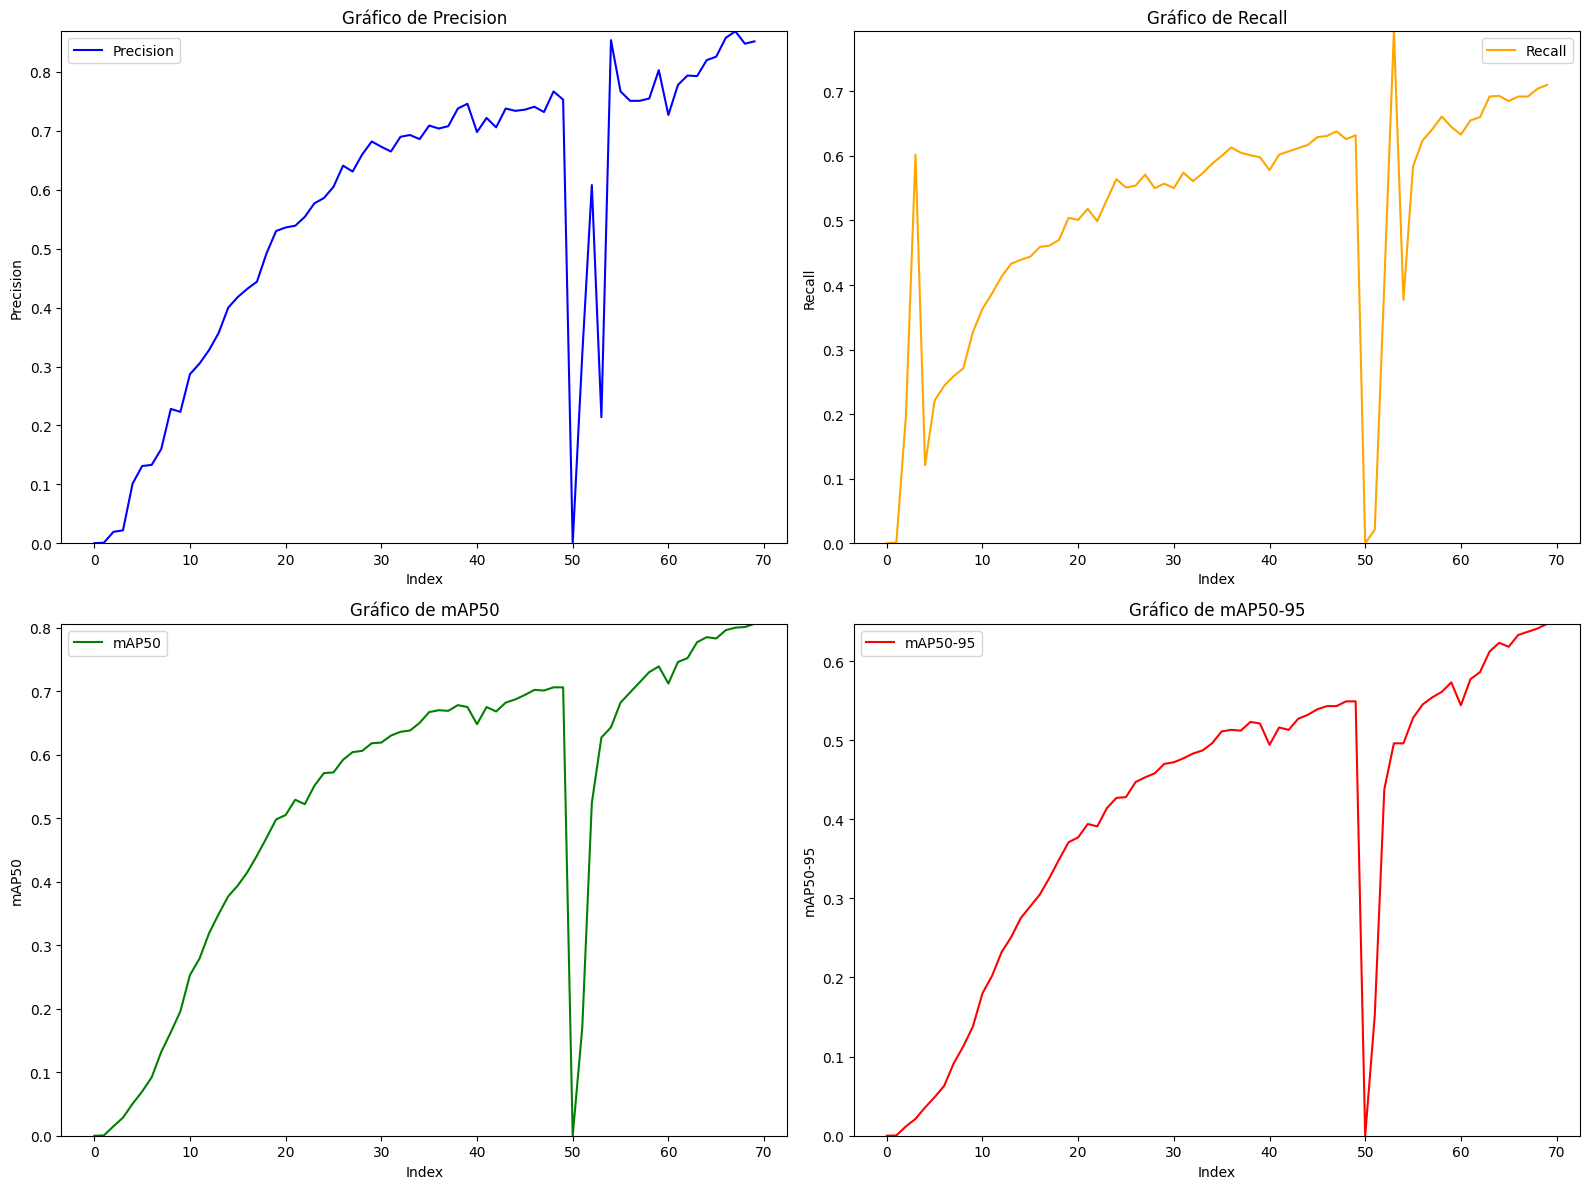

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que 'df' es el DataFrame que creaste anteriormente
epochs = range(len(df))  # Número de entradas en el DataFrame

plt.figure(figsize=(16, 12))

# Gráfico de Precision
plt.subplot(2, 2, 1)
plt.plot(epochs, df['Precision'], label='Precision', color='blue')
plt.legend()
plt.ylim([0, max(df['Precision'])])
plt.xlabel('Index')
plt.ylabel('Precision')
plt.title('Gráfico de Precision')

# Gráfico de Recall
plt.subplot(2, 2, 2)
plt.plot(epochs, df['Recall'], label='Recall', color='orange')
plt.legend()
plt.ylim([0, max(df['Recall'])])
plt.xlabel('Index')
plt.ylabel('Recall')
plt.title('Gráfico de Recall')

# Gráfico de mAP50
plt.subplot(2, 2, 3)
plt.plot(epochs, df['mAP50'], label='mAP50', color='green')
plt.legend()
plt.ylim([0, max(df['mAP50'])])
plt.xlabel('Index')
plt.ylabel('mAP50')
plt.title('Gráfico de mAP50')

# Gráfico de mAP50-95
plt.subplot(2, 2, 4)
plt.plot(epochs, df['mAP50-95'], label='mAP50-95', color='red')
plt.legend()
plt.ylim([0, max(df['mAP50-95'])])
plt.xlabel('Index')
plt.ylabel('mAP50-95')
plt.title('Gráfico de mAP50-95')

plt.tight_layout()
plt.show()


## Matriz de confusión

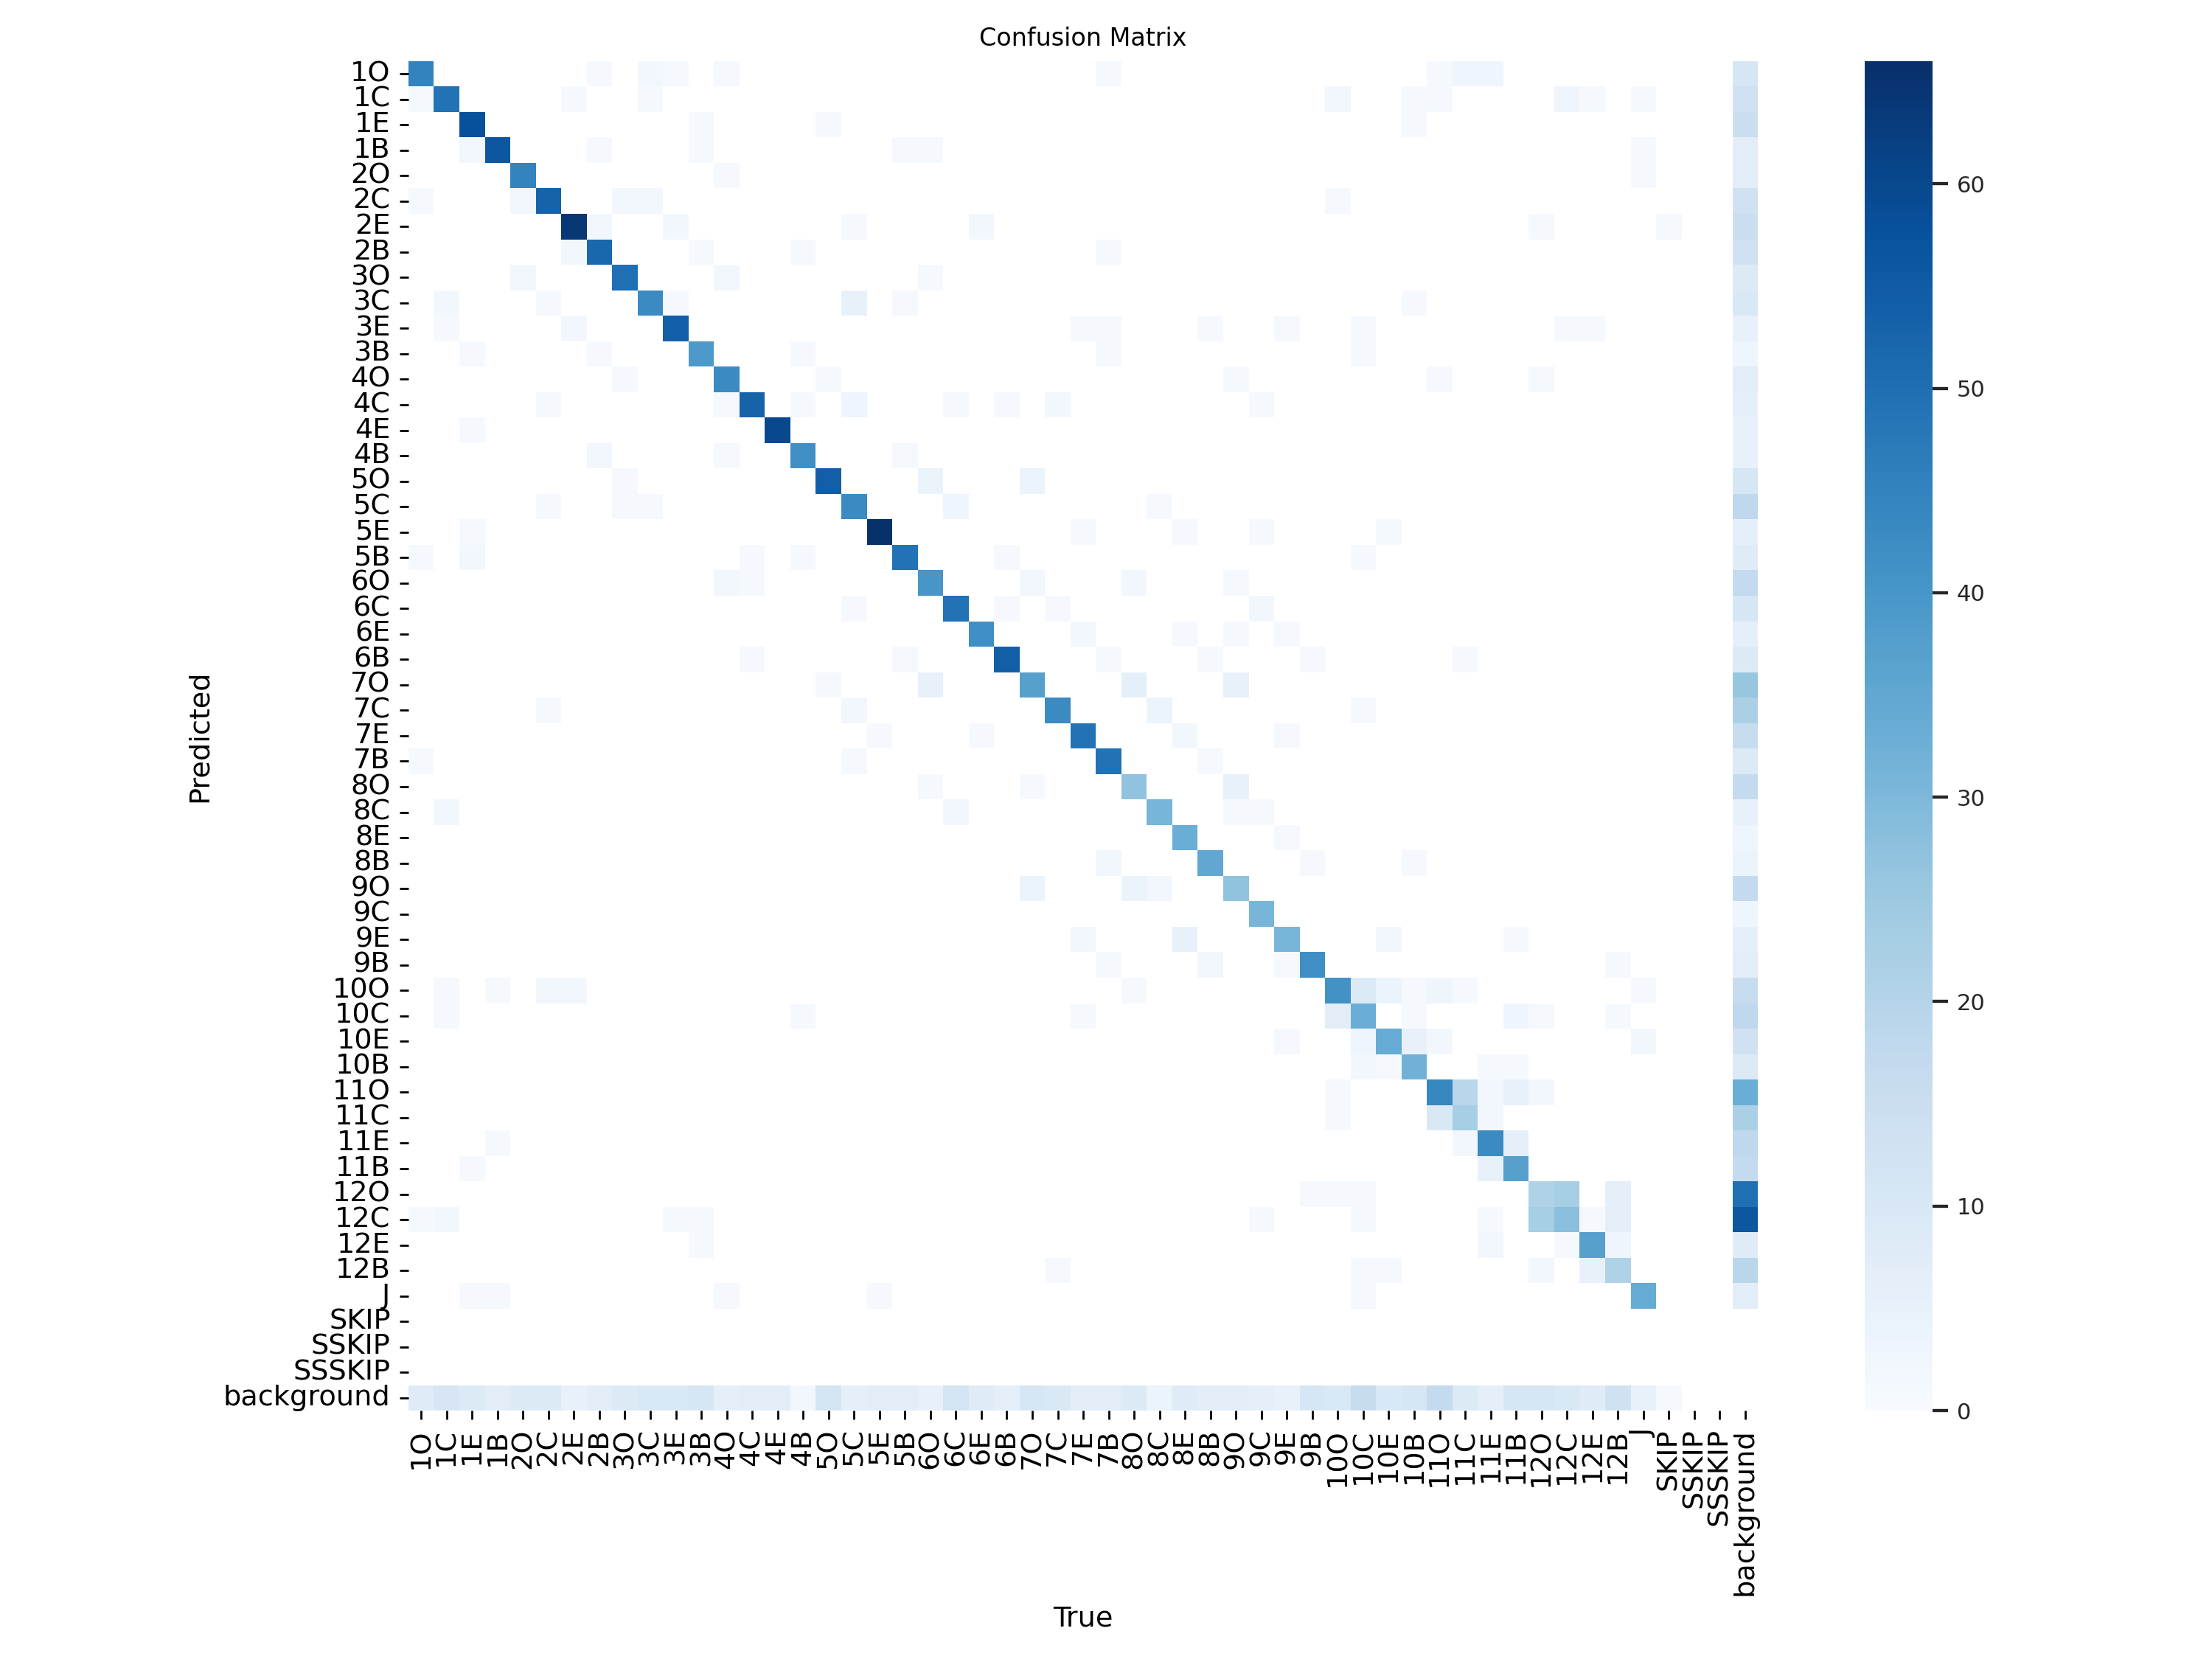

In [ ]:
train_dir = '/content/runs/detect/train4'

from IPython.display import Image
Image(filename=f'{train_dir}/confusion_matrix.png', width=600)

Grafica que relaciona la presicion con el recall, lo ideal es tener la curva lo mas cercano al borde superior y borde derecho.

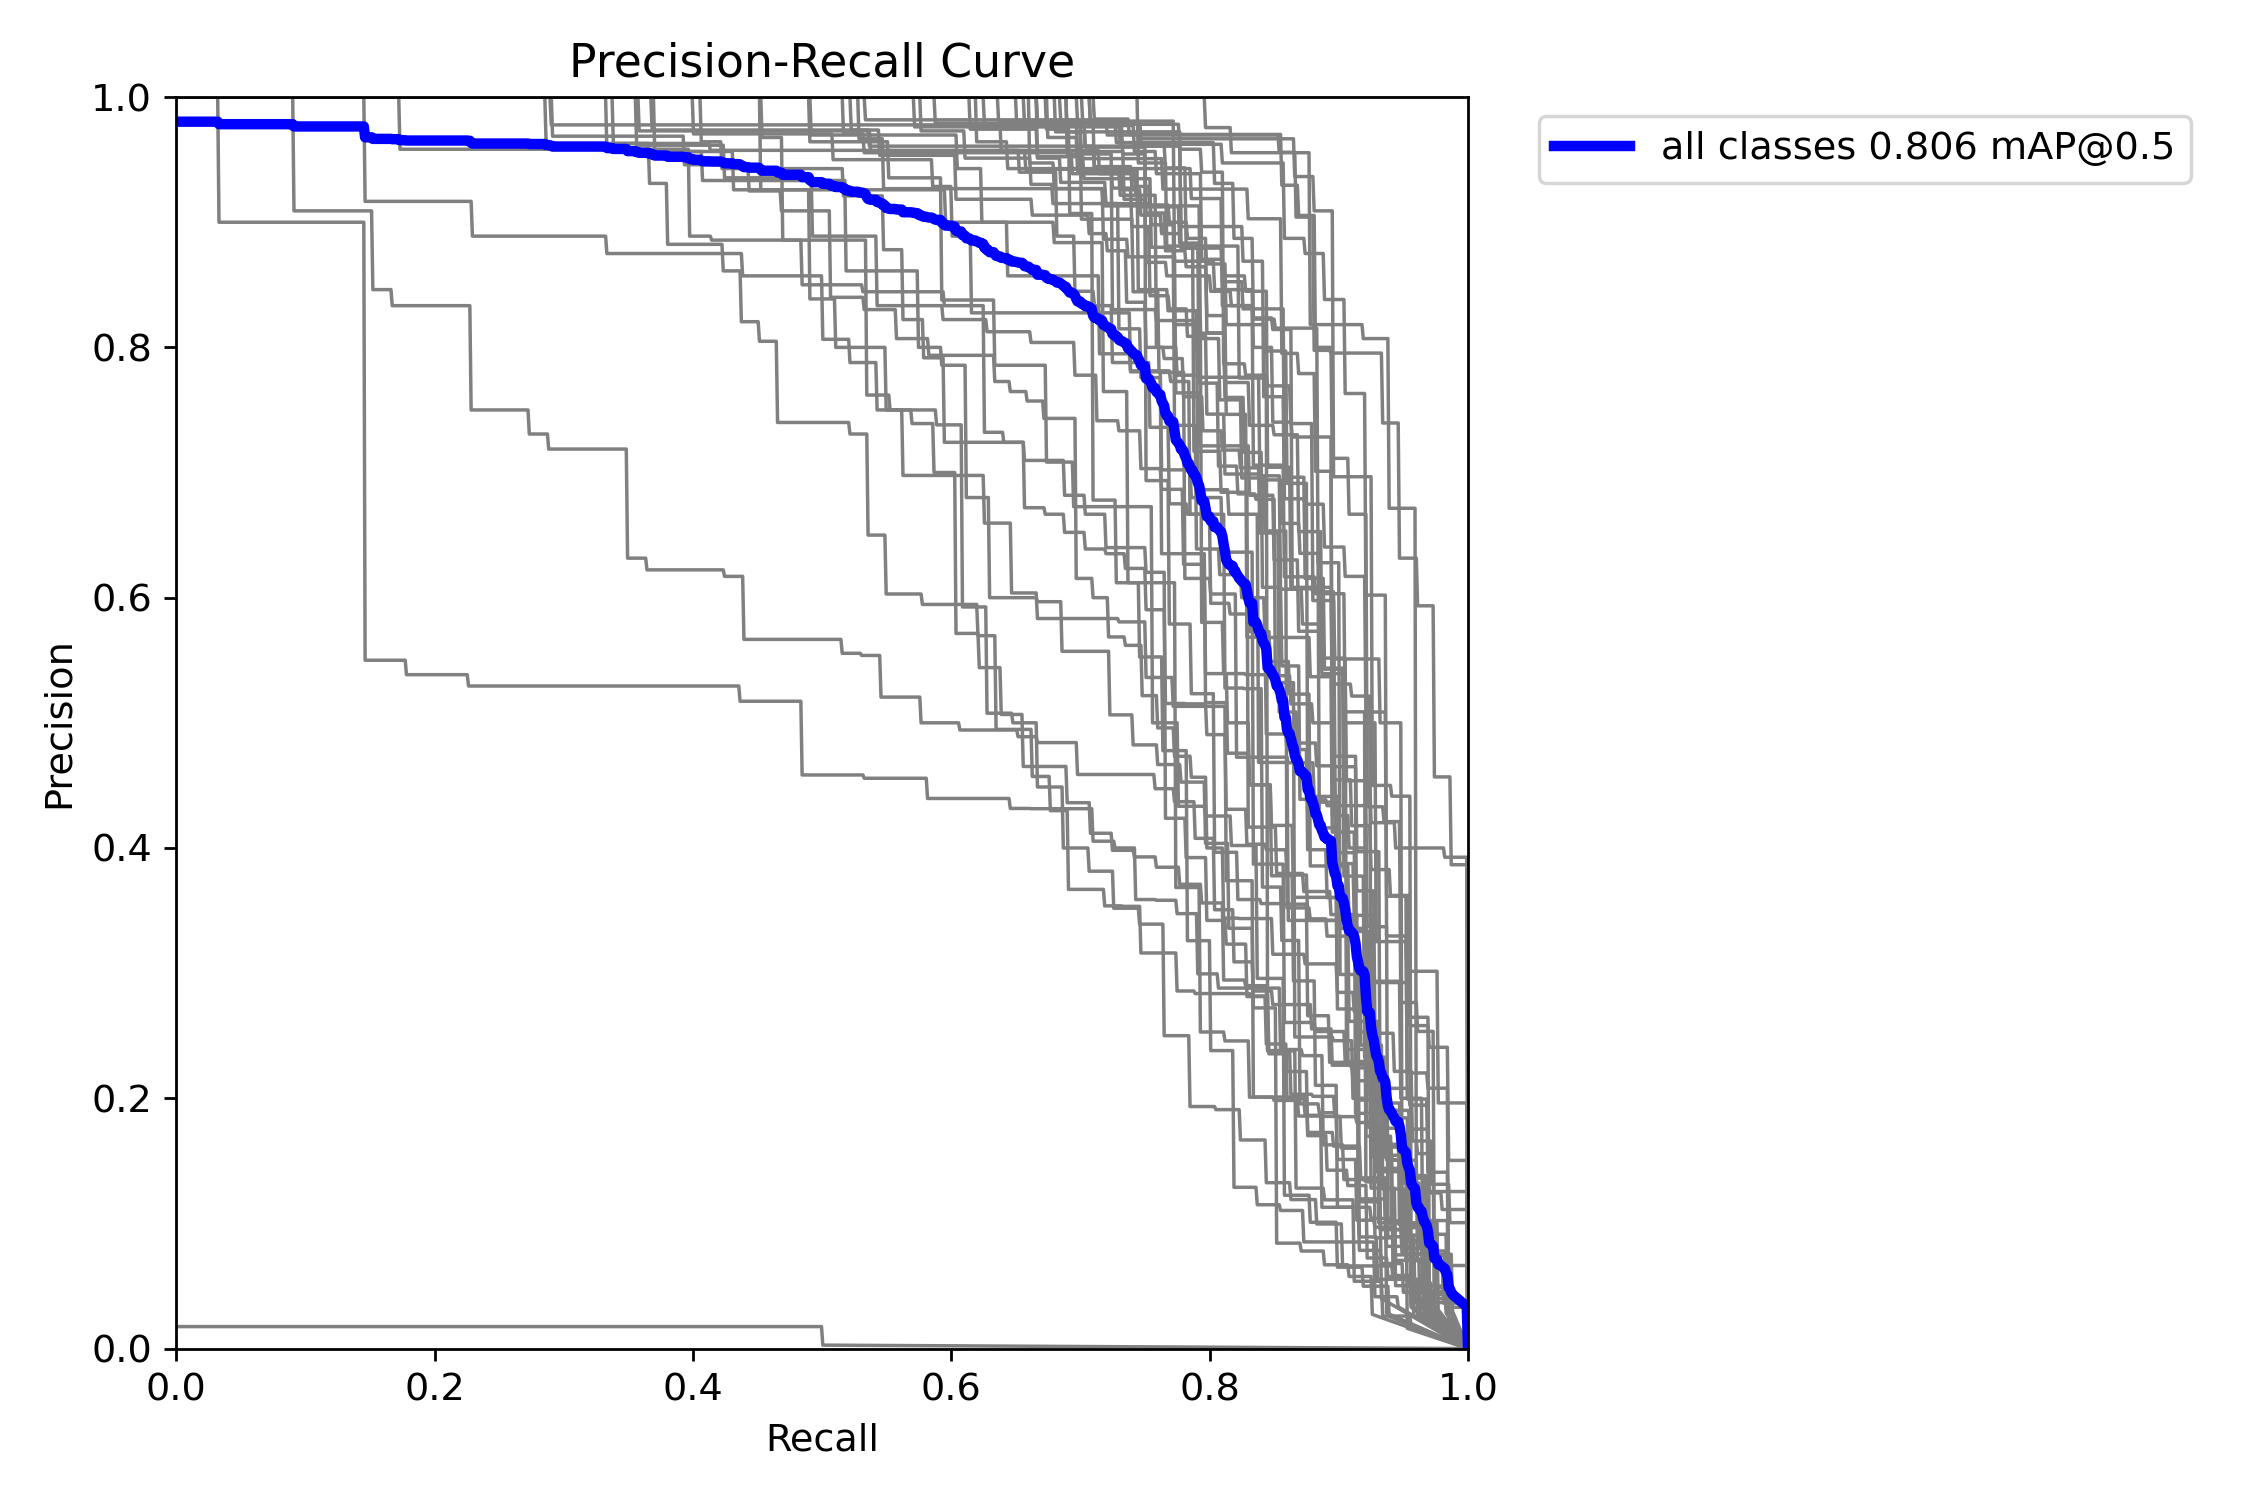

In [ ]:
from IPython.display import Image
Image(filename=f'{train_dir}/PR_curve.png', width=600)

Graficamos algunos ejemplos de detecciones, podemos ver muchas fallas, etiquetas erroneas para algunas cartas y otras que no se detectaron.

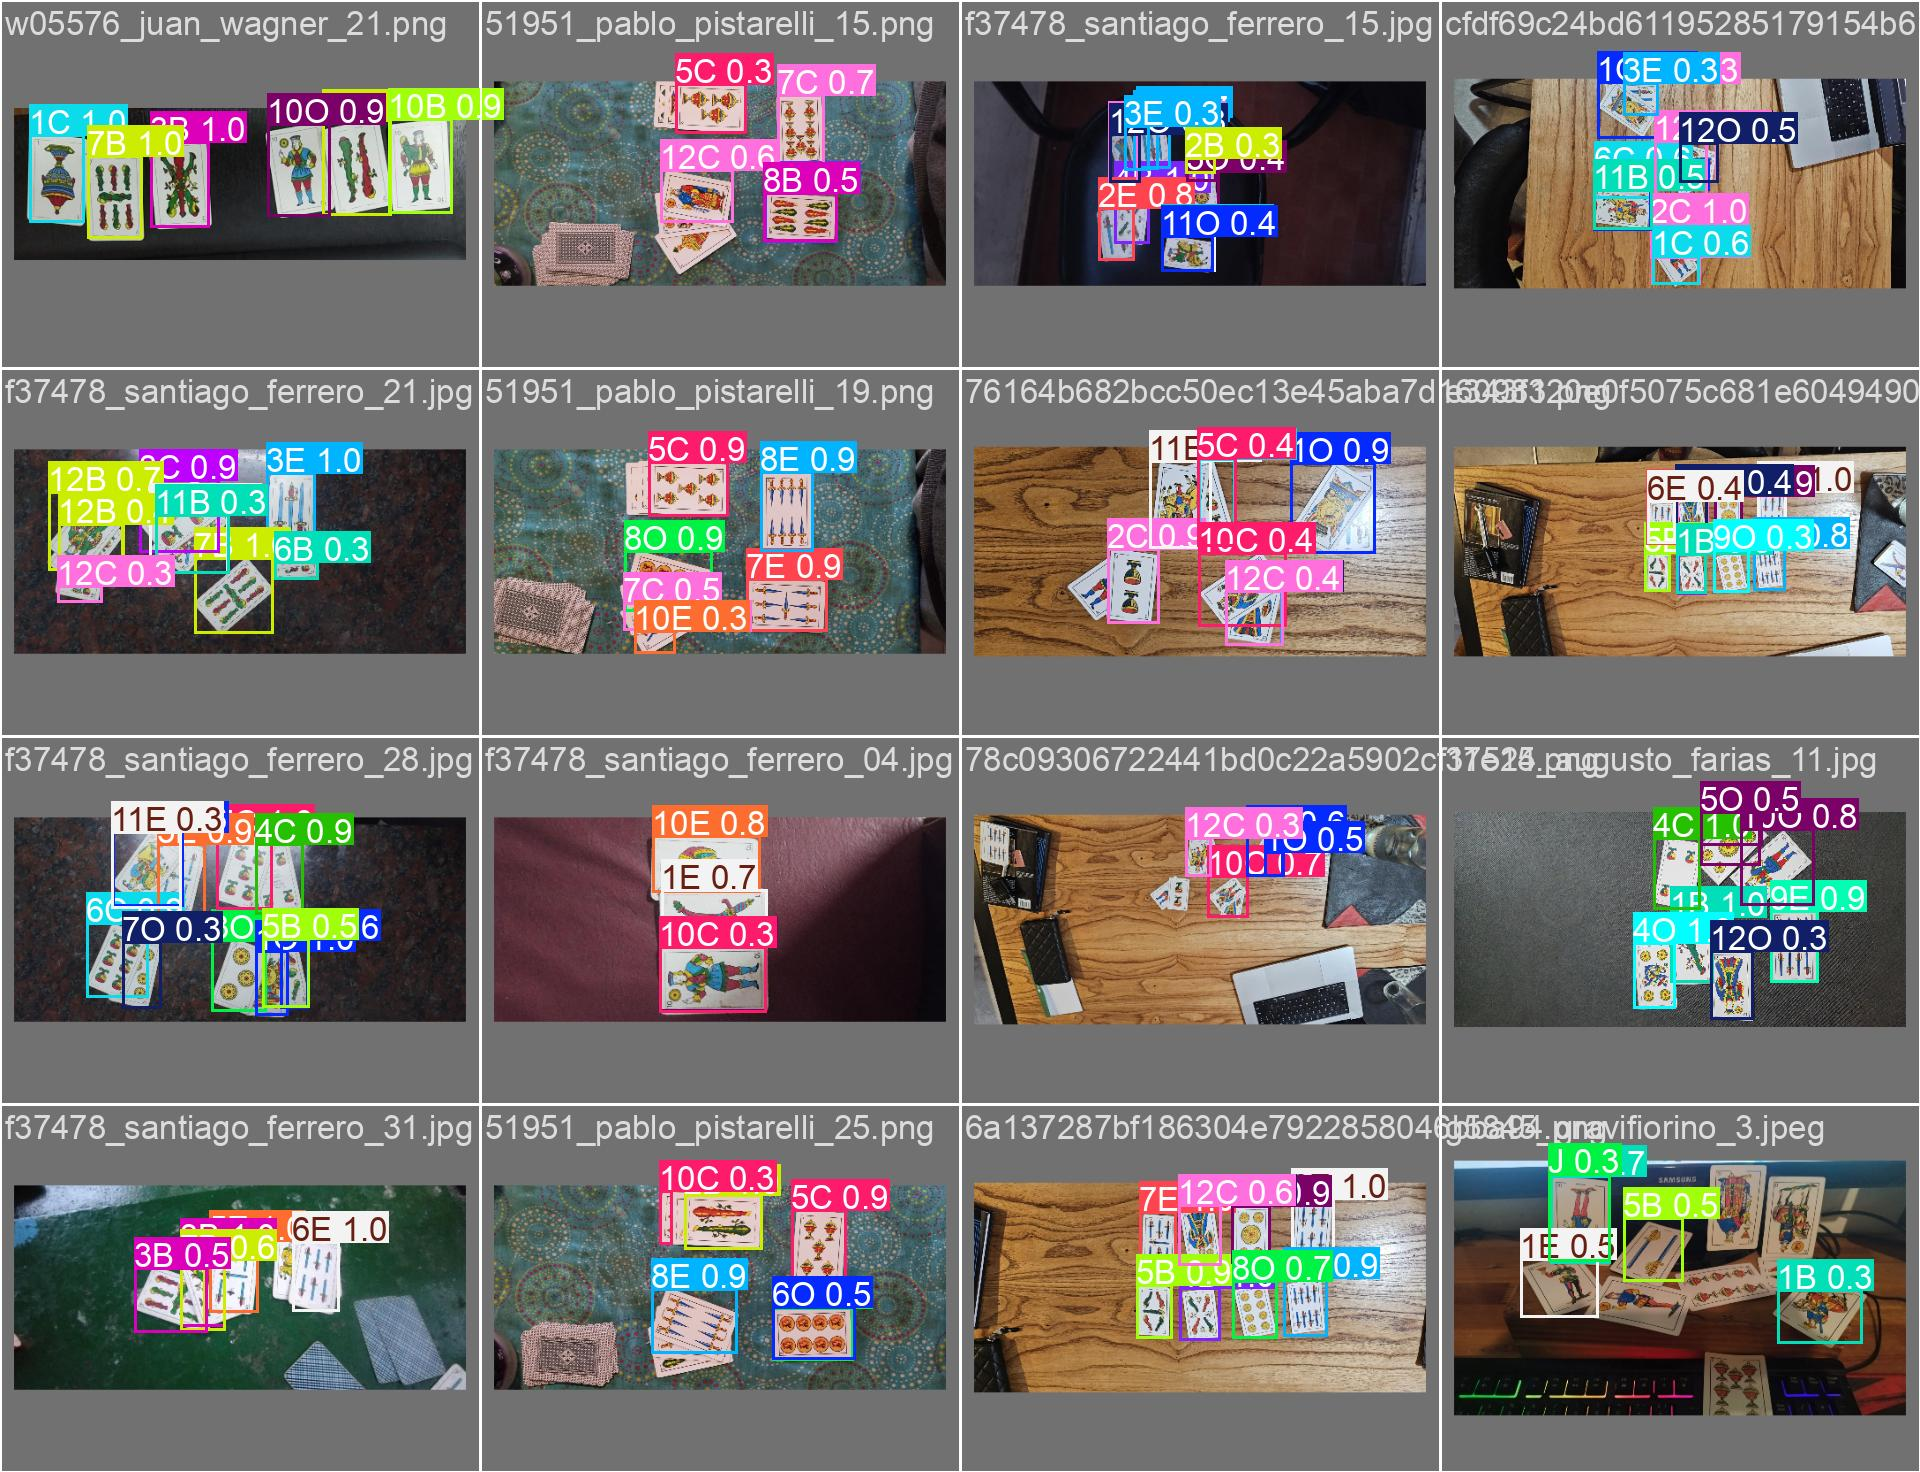

In [ ]:
from IPython.display import Image
Image(filename=f'{train_dir}/val_batch0_pred.jpg', width=600)

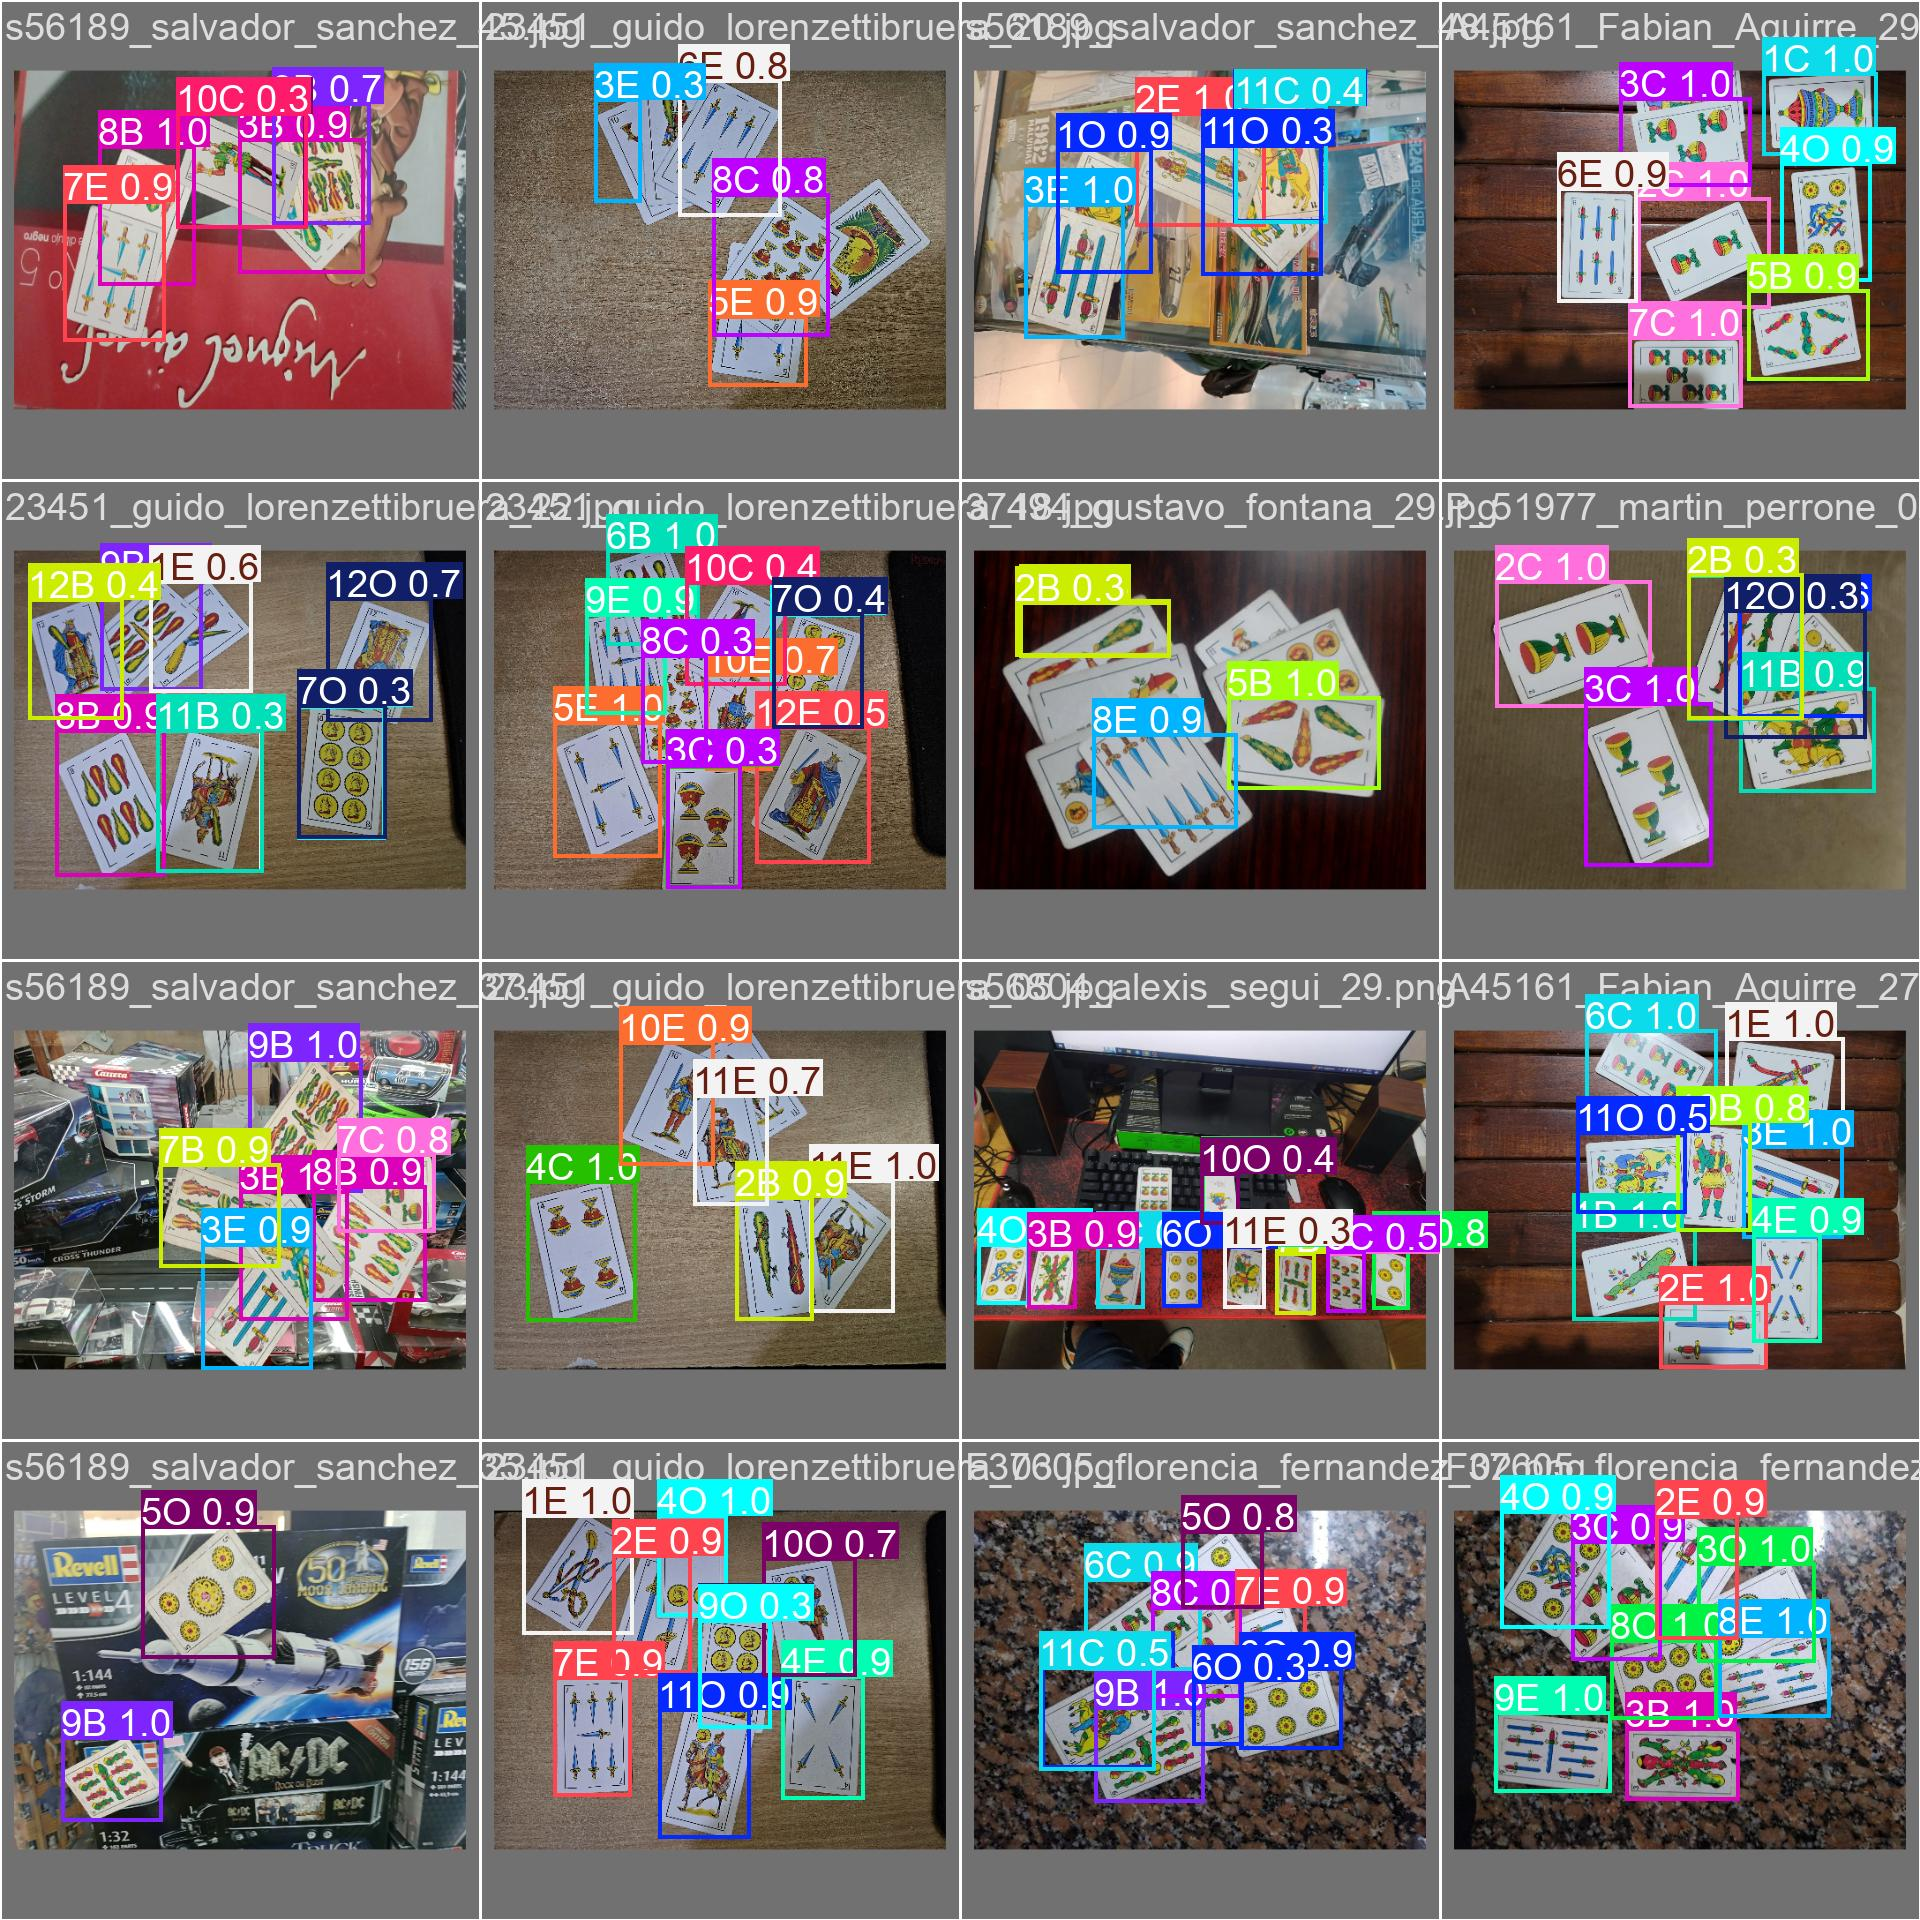

In [ ]:
from IPython.display import Image
Image(filename=f'{train_dir}/val_batch1_pred.jpg', width=600)